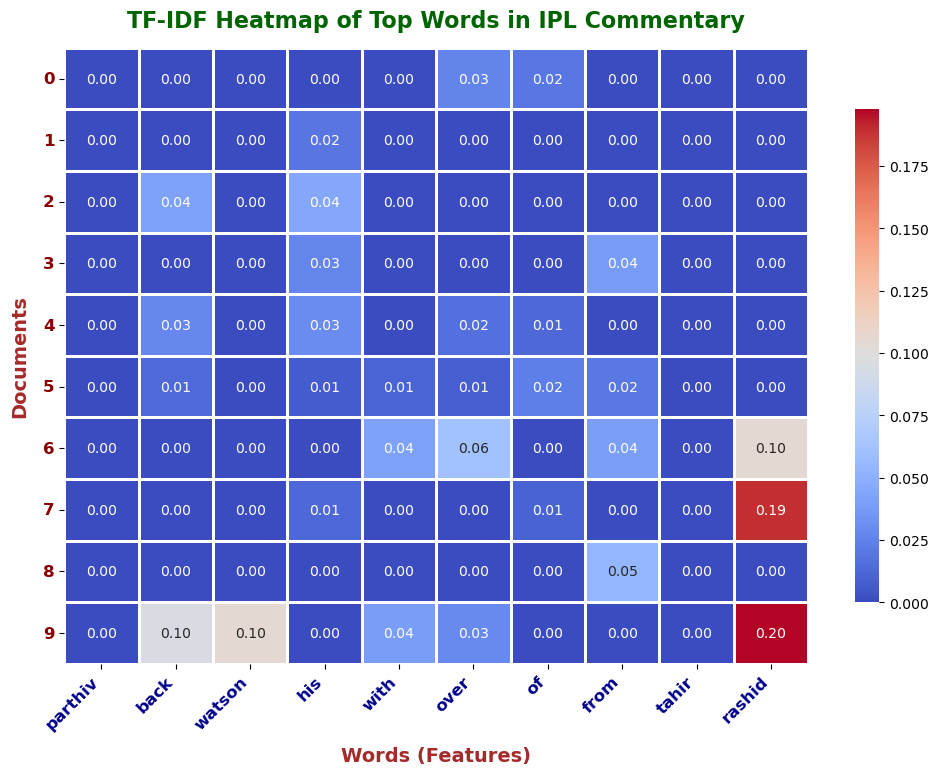

   parthiv      back    watson       his      with      over        of  \
0      0.0  0.000000  0.000000  0.000000  0.000000  0.026177  0.019409   
1      0.0  0.000000  0.000000  0.018585  0.000000  0.000000  0.000000   
2      0.0  0.040958  0.000000  0.044250  0.000000  0.000000  0.000000   
3      0.0  0.000000  0.000000  0.026550  0.000000  0.000000  0.000000   
4      0.0  0.027746  0.000000  0.029976  0.000000  0.016888  0.012522   
5      0.0  0.013233  0.000000  0.007148  0.010815  0.008055  0.023888   
6      0.0  0.000000  0.000000  0.000000  0.041353  0.061593  0.000000   
7      0.0  0.000000  0.000000  0.012390  0.000000  0.000000  0.010351   
8      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9      0.0  0.095569  0.104702  0.000000  0.039056  0.029086  0.000000   

       from  tahir    rashid  
0  0.000000    0.0  0.000000  
1  0.000000    0.0  0.000000  
2  0.000000    0.0  0.000000  
3  0.038443    0.0  0.000000  
4  0.000000    0.0  0.000000  

In [11]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

file_path = "IPL_Match_Highlights_Commentary.csv"
df = pd.read_csv(file_path)
documents = df["Commentary"].dropna().tolist()
tokenized_docs = [doc.lower().split() for doc in documents]
df_counts = Counter(word for tokens in tokenized_docs for word in set(tokens))
total_docs = len(tokenized_docs)
word_frequencies = Counter(word for tokens in tokenized_docs for word in tokens)
top_words = [word for word, _ in word_frequencies.most_common(500)]
idf_values = {word: math.log(total_docs / (1 + df_counts[word])) for word in top_words}

tfidf_sparse = []
for tokens in tokenized_docs[:100]:
    word_counts = Counter(tokens)
    total_words = len(tokens)
    tfidf_sparse.append({word: (word_counts[word] / total_words) * idf_values[word] for word in word_counts if word in idf_values})

tfidf_df_scratch = pd.DataFrame(tfidf_sparse).fillna(0)
top_words_subset = tfidf_df_scratch.mean().sort_values(ascending=False).head(10).index
tfidf_df_scratch = tfidf_df_scratch[top_words_subset]
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df_scratch.head(10), annot=True, cmap="coolwarm", linewidths=1, fmt=".2f", cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight="bold", color="darkblue")
plt.yticks(rotation=0, fontsize=12, fontweight="bold", color="darkred")
plt.title("TF-IDF Heatmap of Top Words in IPL Commentary", fontsize=16, fontweight="bold", color="darkgreen", pad=15)
plt.xlabel("Words (Features)", fontsize=14, fontweight="bold", color="brown", labelpad=10)
plt.ylabel("Documents", fontsize=14, fontweight="bold", color="brown", labelpad=10)
plt.show()
print(tfidf_df_scratch.head(10))